<a href="https://colab.research.google.com/github/wannleach/MAT-421/blob/main/ModuleH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 22 - Ordinary Differential Equations (Part 2)**

*22.4: Numerical Error and Instability*

Depending on what method of approximation used for ODE integration, the error in the approximation can increase as time goes on. This increase in error can lead to instability. However, a way to mitigate approximation error with methods such as Explicit Euler is to have a smaller step size for shorter jumps between approximations. This is demonstrated below using three different methods with the pendulum equation provided by the textbook: Explicit Euler, Implicit Euler, and the Trapezoidal Rule.

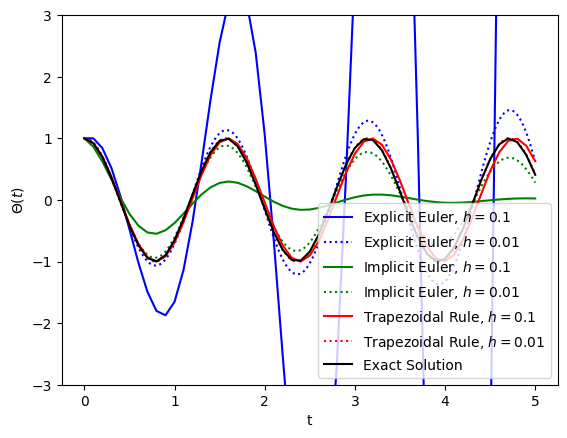

In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Define Parameters
h1 = 0.1                    # step size 0.1
h2 = 0.01                   # step size 0.01
t1 = np.arange(0, 5.1, h1)  # t-values for step size 0.1
t2 = np.arange(0, 5.01, h2) # t-values for step size 0.01
w = 4                       # oscillation freq. of pendulum
s0 = np.array([[1], [0]])   # initial condition

# Approximation Method Equations w/ Varying Step Sizes
m1_e = np.array([[1, h1], [-w**2 * h1, 1]]) # explicit euler, step size 0.1
m2_e = np.array([[1, h2], [-w**2 * h2, 1]]) # explici euler, step size 0.01
m1_i = inv(np.array([[1, -h1], [w**2 * h1, 1]])) # implicit euler, step size 0.1
m2_i = inv(np.array([[1, -h2], [w**2 * h2, 1]])) # implicit euler, step size 0.01
m1_t = np.dot(inv(np.array([[1, -h1 / 2], [w**2 * h1 / 2, 1]])), # trapezoid rule, step size 0.1 
                 np.array([[1, h1 / 2], [-w**2 * h1 / 2, 1]]))
m2_t = np.dot(inv(np.array([[1, -h2 / 2], [w**2 * h2 / 2, 1]])), # trapezoid rule, step size 0.01
                 np.array([[1, h2 / 2], [-w**2 * h2 / 2, 1]]))

# Empty arrays to hold integral approximations
s1_e = np.zeros((len(t1), 2))
s2_e = np.zeros((len(t2), 2))
s1_i = np.zeros((len(t1), 2))
s2_i = np.zeros((len(t2), 2))
s1_t = np.zeros((len(t1), 2))
s2_t = np.zeros((len(t2), 2))

# Integral Approximations
s1_e[0, :] = s0.T
s2_e[0, :] = s0.T
s1_i[0, :] = s0.T
s2_i[0, :] = s0.T
s1_t[0, :] = s0.T
s2_t[0, :] = s0.T

for j in range(0, len(t1) - 1):
    s1_e[j+1, :] = np.dot(m1_e, s1_e[j, :])
    s1_i[j+1, :] = np.dot(m1_i, s1_i[j, :])
    s1_t[j+1, :] = np.dot(m1_t, s1_t[j, :])

for j in range(0, len(t2) - 1):
  s2_e[j+1, :] = np.dot(m2_e, s2_e[j, :])
  s2_i[j+1, :] = np.dot(m2_i, s2_i[j, :])
  s2_t[j+1, :] = np.dot(m2_t, s2_t[j, :])

# Comparing Solutions
plt.figure()
plt.plot(t1, s1_e[:,0], 'b-', label = "Explicit Euler, $h = 0.1$")
plt.plot(t2, s2_e[:,0], 'b:', label = "Explicit Euler, $h = 0.01$")
plt.plot(t1, s1_i[:,0], 'g-', label = "Implicit Euler, $h = 0.1$")
plt.plot(t2, s2_i[:,0], 'g:', label = "Implicit Euler, $h = 0.01$")
plt.plot(t1, s1_t[:,0], 'r-', label = "Trapezoidal Rule, $h = 0.1$")
plt.plot(t2, s2_t[:,0], 'r:', label = "Trapezoidal Rule, $h = 0.01$")
plt.plot(t1, np.cos(w*t1), 'k', label = "Exact Solution")
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend()
plt.show()

*22.5: Runge-Kutta*

Runge-Kutta is a variation of Euler's methods, using the same technique applied to $n$ number of terms in the Taylor series expansion of Euler's technique and takes a weighted average of these points in the expansion. Runge-Kutta 4 uses $n=4$ and is a classic method for approximating ODE's. Both varying step size and number of steps affect the accuracy of the end result, as demonstrated below:

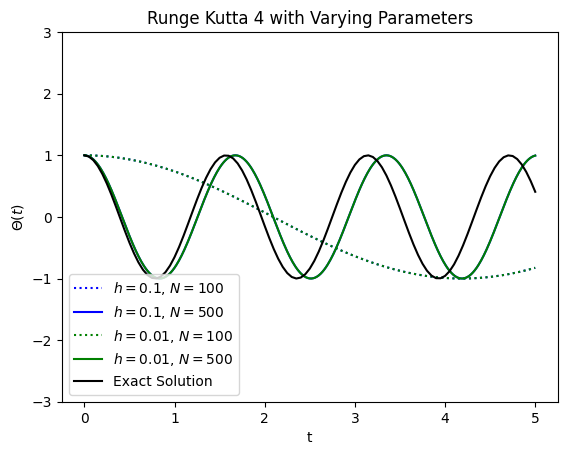

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Derivative function for the pendulum equation
def pendulum(t, s, w):
    dsdt = np.zeros_like(s)         # empty array for storage
    dsdt[0] = s[1]                  # setting initial condition
    dsdt[1] = -w**2 * np.sin(s[0])  # calculating function value
    return dsdt                     # return function value

# Define parameters for pendulum equation
h1 = 0.1                     # step size 0.1
h2 = 0.01                    # step size 0.01
N1 = 100                     # 100 steps
N2 = 500                     # 200 steps
tspan = [0, 5]               # t-value interval
w = 4                        # oscillation freq. of pendulum
s0 = np.array([1, 0])        # initial condition of pendulum function s

# Runge-Kutta 4 function for ODE approximation
def rk4(f, tspan, s0, h, w, N):
  t = np.linspace(*tspan, N + 1)  # unpack tspan & partition to N number of steps
  s = np.zeros((N + 1, len(s0)))  # empty array to store approx pendulum values

  s[0] = s0                    # initial s-value (pendulum value)

  for j in range(N):
    k1 = h * f(t[j], s[j], w)                  # first in Taylor series
    k2 = h * f(t[j] + h / 2, s[j] + k1 / 2, w) # second in Taylor series
    k3 = h * f(t[j] + h / 2, s[j] + k2 / 2, w) # third in Taylor series
    k4 = h * f(t[j] + h, s[j] + k3, w)         # fourth in Taylor series
    s[j + 1] = s[j] + (k1 + 2 * (k2 + k3) + k4) / 6   # weighted average of Taylor series values

  return t, s.T                                       # return t-values and correct shape for pendulum s values

# Use rk4 function to approximate pendulum ODE w/ varying step sizes
t1, s1  = rk4(pendulum, tspan, s0, h1, w, N1)
t2, s2  = rk4(pendulum, tspan, s0, h1, w, N2)
t1, s1  = rk4(pendulum, tspan, s0, h2, w, N1)
t2, s2  = rk4(pendulum, tspan, s0, h2, w, N2)

# Plotting
plt.figure()
plt.plot(t1, s1[0], 'b:', label = "$h = 0.1$, $N = 100$")
plt.plot(t2, s2[0], 'b-', label = "$h = 0.1$, $N = 500$")
plt.plot(t1, s1[0], 'g:', label = "$h = 0.01$, $N = 100$")
plt.plot(t2, s2[0], 'g-', label = "$h = 0.01$, $N = 500$")
plt.plot(t1, np.cos(w*t1), 'k', label = "Exact Solution")
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend()
plt.title("Runge Kutta 4 with Varying Parameters")
plt.show()


*22.6: Python ODE Solvers*

Python has a built-in function "$solve_ivp$" to solve initial-value ODE problems, with relatively accurate solutions. The accuracy of this solution is shown below:

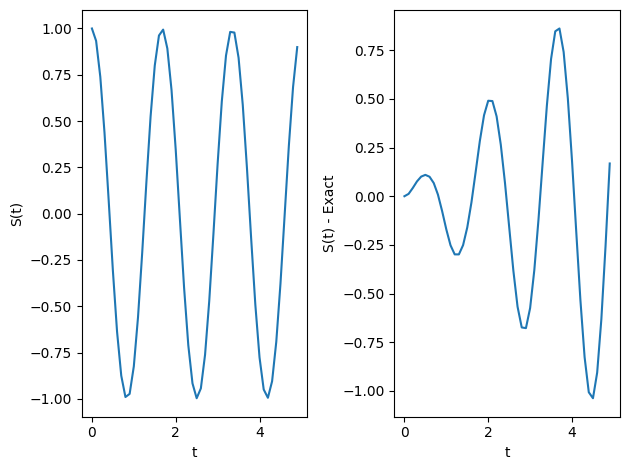

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# Define parameters for pendulum equation
w = 4                     # oscillation freq. of pendulum
tspan = np.arange(0, 5, 0.1) # t-value interval
s0 = np.array([1, 0])        # initial condition of pendulum function s
exact = np.cos(w*tspan)

# Derivative function for the pendulum equation
def pendulum(t, s):
    dsdt = np.zeros_like(s)
    dsdt[0] = s[1]
    dsdt[1] = -w**2 * np.sin(s[0])
    return dsdt

sol = solve_ivp(pendulum, [0, 5], s0, t_eval=tspan)

plt.figure()
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - exact)
plt.xlabel('t')
plt.ylabel('S(t) - Exact')
plt.tight_layout()
plt.show()